# Spark SQL Examples

In [1]:
from pyspark.sql import SparkSession
import pyspark.sql.functions as F
import pyspark.sql.types as T
import datetime
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
spark = (SparkSession 
             .builder 
             .appName("data-wranging-spark-sql") 
             .getOrCreate()
)

In [4]:
path = "../data/json/sparkify_log_small.json"
user_log = spark.read.json(path)

In [5]:
user_log.take(1)

[Row(artist='Showaddywaddy', auth='Logged In', firstName='Kenneth', gender='M', itemInSession=112, lastName='Matthews', length=232.93342, level='paid', location='Charlotte-Concord-Gastonia, NC-SC', method='PUT', page='NextSong', registration=1509380319284, sessionId=5132, song='Christmas Tears Will Fall', status=200, ts=1513720872284, userAgent='"Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1985.125 Safari/537.36"', userId='1046')]

In [6]:
user_log.printSchema()

root
 |-- artist: string (nullable = true)
 |-- auth: string (nullable = true)
 |-- firstName: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- itemInSession: long (nullable = true)
 |-- lastName: string (nullable = true)
 |-- length: double (nullable = true)
 |-- level: string (nullable = true)
 |-- location: string (nullable = true)
 |-- method: string (nullable = true)
 |-- page: string (nullable = true)
 |-- registration: long (nullable = true)
 |-- sessionId: long (nullable = true)
 |-- song: string (nullable = true)
 |-- status: long (nullable = true)
 |-- ts: long (nullable = true)
 |-- userAgent: string (nullable = true)
 |-- userId: string (nullable = true)



# Create a View And Run Queries

The code below creates a temporary view against which you can run SQL queries.

In [7]:
user_log.createOrReplaceTempView("user_log_table")

In [8]:
spark.sql("SELECT * FROM user_log_table LIMIT 2").show()

+-------------+---------+---------+------+-------------+--------+---------+-----+--------------------+------+--------+-------------+---------+--------------------+------+-------------+--------------------+------+
|       artist|     auth|firstName|gender|itemInSession|lastName|   length|level|            location|method|    page| registration|sessionId|                song|status|           ts|           userAgent|userId|
+-------------+---------+---------+------+-------------+--------+---------+-----+--------------------+------+--------+-------------+---------+--------------------+------+-------------+--------------------+------+
|Showaddywaddy|Logged In|  Kenneth|     M|          112|Matthews|232.93342| paid|Charlotte-Concord...|   PUT|NextSong|1509380319284|     5132|Christmas Tears W...|   200|1513720872284|"Mozilla/5.0 (Win...|  1046|
|   Lily Allen|Logged In|Elizabeth|     F|            7|   Chase|195.23873| free|Shreveport-Bossie...|   PUT|NextSong|1512718541284|     5027|      

In [9]:
spark.sql("""
          SELECT * 
          FROM user_log_table 
          LIMIT 2
          """
          ).show()

+-------------+---------+---------+------+-------------+--------+---------+-----+--------------------+------+--------+-------------+---------+--------------------+------+-------------+--------------------+------+
|       artist|     auth|firstName|gender|itemInSession|lastName|   length|level|            location|method|    page| registration|sessionId|                song|status|           ts|           userAgent|userId|
+-------------+---------+---------+------+-------------+--------+---------+-----+--------------------+------+--------+-------------+---------+--------------------+------+-------------+--------------------+------+
|Showaddywaddy|Logged In|  Kenneth|     M|          112|Matthews|232.93342| paid|Charlotte-Concord...|   PUT|NextSong|1509380319284|     5132|Christmas Tears W...|   200|1513720872284|"Mozilla/5.0 (Win...|  1046|
|   Lily Allen|Logged In|Elizabeth|     F|            7|   Chase|195.23873| free|Shreveport-Bossie...|   PUT|NextSong|1512718541284|     5027|      

In [10]:
spark.sql("""
          SELECT COUNT(*) 
          FROM user_log_table 
          """
).show()

+--------+
|count(1)|
+--------+
|   10000|
+--------+



In [12]:
spark.sql("""
          SELECT userID, firstname, page, song
          FROM user_log_table 
          WHERE userID == '1046'
          """
).show()

+------+---------+--------+--------------------+
|userID|firstname|    page|                song|
+------+---------+--------+--------------------+
|  1046|  Kenneth|NextSong|Christmas Tears W...|
|  1046|  Kenneth|NextSong|  Be Wary Of A Woman|
|  1046|  Kenneth|NextSong|   Public Enemy No.1|
|  1046|  Kenneth|NextSong|Reign Of The Tyrants|
|  1046|  Kenneth|NextSong|      Father And Son|
|  1046|  Kenneth|NextSong|               No. 5|
|  1046|  Kenneth|NextSong|           Seventeen|
|  1046|  Kenneth|    Home|                null|
|  1046|  Kenneth|NextSong|          War on war|
|  1046|  Kenneth|NextSong|   Killermont Street|
|  1046|  Kenneth|NextSong|        Black & Blue|
|  1046|  Kenneth|  Logout|                null|
|  1046|  Kenneth|    Home|                null|
|  1046|  Kenneth|NextSong|     Heads Will Roll|
|  1046|  Kenneth|NextSong|Bleed It Out [Liv...|
|  1046|  Kenneth|NextSong|              Clocks|
|  1046|  Kenneth|NextSong|           Love Rain|
|  1046|  Kenneth|Ne

In [13]:
spark.sql('''
          SELECT DISTINCT page
          FROM user_log_table 
          ORDER BY page ASC
          '''
).show()

+----------------+
|            page|
+----------------+
|           About|
|       Downgrade|
|           Error|
|            Help|
|            Home|
|           Login|
|          Logout|
|        NextSong|
|   Save Settings|
|        Settings|
|Submit Downgrade|
|  Submit Upgrade|
|         Upgrade|
+----------------+



# User Defined Functions

In [48]:
spark.udf.register("get_hour", lambda x: int(datetime.datetime.fromtimestamp(x / 1000.0).hour));

In [47]:
spark.sql("""
          SELECT *, get_hour(ts) AS hour
          FROM user_log_table 
          LIMIT 1
          """
).show()

+-------------+---------+---------+------+-------------+--------+---------+-----+--------------------+------+--------+-------------+---------+--------------------+------+-------------+--------------------+------+----+
|       artist|     auth|firstName|gender|itemInSession|lastName|   length|level|            location|method|    page| registration|sessionId|                song|status|           ts|           userAgent|userId|hour|
+-------------+---------+---------+------+-------------+--------+---------+-----+--------------------+------+--------+-------------+---------+--------------------+------+-------------+--------------------+------+----+
|Showaddywaddy|Logged In|  Kenneth|     M|          112|Matthews|232.93342| paid|Charlotte-Concord...|   PUT|NextSong|1509380319284|     5132|Christmas Tears W...|   200|1513720872284|"Mozilla/5.0 (Win...|  1046|  22|
+-------------+---------+---------+------+-------------+--------+---------+-----+--------------------+------+--------+----------

In [17]:
songs_in_hour = spark.sql('''
          SELECT 
              get_hour(ts) AS hour, 
              COUNT(*) as plays_per_hour
          FROM user_log_table
          WHERE page = "NextSong"
          GROUP BY hour
          ORDER BY cast(hour as int) ASC
          '''
)

In [18]:
songs_in_hour.show(10)

+----+--------------+
|hour|plays_per_hour|
+----+--------------+
|   0|           456|
|   1|           454|
|   2|           382|
|   3|           302|
|   4|           352|
|   5|           276|
|   6|           348|
|   7|           358|
|   8|           375|
|   9|           249|
+----+--------------+
only showing top 10 rows



# Converting Results to Pandas

In [19]:
songs_in_hour_pd = songs_in_hour.toPandas()

In [26]:
songs_in_hour_pd.head()

,hour,plays_per_hour
0,0,456
1,1,454
2,2,382
3,3,302
4,4,352


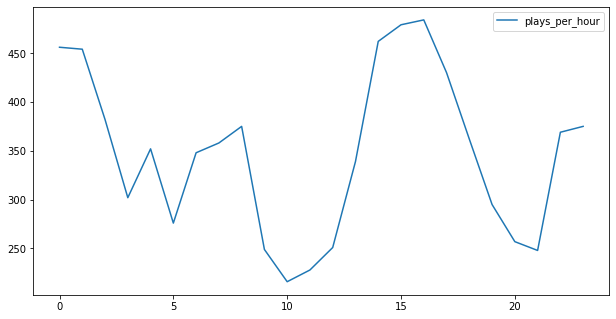

In [45]:
fig = plt.figure(figsize=(8,4))
ax = fig.add_axes([0,0,1,1])

songs_in_hour_pd.plot(ax=ax);

# Quiz questions

**Which page did user id ""(empty string) NOT visit?**

In [49]:
spark.sql("""
          SELECT DISTINCT page
          FROM user_log_table 
          WHERE userId = ""
          """
).show()

+-----+
| page|
+-----+
| Home|
|About|
|Login|
| Help|
+-----+



**How many female users do we have in the data set?**

In [50]:
spark.sql("""
          SELECT 
              gender,
              COUNT(DISTINCT userId) AS users
          FROM user_log_table 
          GROUP BY 1
          """
).show()

+------+-----+
|gender|users|
+------+-----+
|     F|  462|
|     M|  501|
|  null|    1|
+------+-----+



**How many songs were played from the most played artist?**

In [51]:
spark.sql("""
          SELECT 
              artist,
              COUNT(*) AS songs
          FROM user_log_table 
          WHERE page = 'NextSong'
          GROUP BY 1
          ORDER BY songs DESC
          """
).show()

+--------------------+-----+
|              artist|songs|
+--------------------+-----+
|            Coldplay|   83|
|       Kings Of Leon|   69|
|Florence + The Ma...|   52|
|            BjÃÂ¶rk|   46|
|       Dwight Yoakam|   45|
|       Justin Bieber|   43|
|      The Black Keys|   40|
|         OneRepublic|   37|
|        Jack Johnson|   36|
|                Muse|   36|
|           Radiohead|   31|
|        Taylor Swift|   29|
|Barry Tuckwell/Ac...|   28|
|               Train|   28|
|          Lily Allen|   28|
|          Nickelback|   27|
|           Metallica|   27|
|           Daft Punk|   27|
|          Kanye West|   26|
|          John Mayer|   24|
+--------------------+-----+
only showing top 20 rows



**How many songs do users listen to on average between visiting our home page? Please round your answer to the closest integer**

In [67]:
home_cum_sum = spark.sql("""
                         WITH base AS (
                             SELECT 
                                 userId,
                                 ts,
                                 page,
                                 CASE WHEN page == 'Home' THEN 1 ELSE 0 END AS isHome
                             FROM user_log_table 
                             WHERE 
                                 page = 'NextSong'
                                 OR page = 'Home'
                          ),
                          
                          home_cum_sum AS (
                              SELECT 
                                  *,
                                  SUM(isHome) OVER (PARTITION BY userId ORDER BY ts ASC ROWS BETWEEN UNBOUNDED PRECEDING AND CURRENT ROW) AS period
                              FROM base
                          ),
                          
                          count_songs AS (
                              SELECT
                                  userId,
                                  period,
                                  COUNT(*) AS numSongs
                              FROM home_cum_sum                              
                              WHERE page = 'NextSong'
                              GROUP BY 1,2
                          )
                                                    
                          SELECT AVG(numSongs) FROM count_songs
                          """
)

In [68]:
home_cum_sum.show()

+------------------+
|     avg(numSongs)|
+------------------+
|6.9558333333333335|
+------------------+

